# https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf

In [89]:
# Data Analysis packages
import pandas as pd
import pandas_profiling 
import numpy as np


# Data Visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Other useful packages
from datetime import datetime
import warnings
import os
from tqdm import tqdm, tqdm_notebook
from subprocess import check_output
from pydotplus.graphviz import graph_from_dot_data

# Sklearn API
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

# Classification Algo Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Regression Algo Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#XGBOOST
from xgboost import XGBClassifier


# Stats API
import scipy.stats as stats
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import statsmodels.formula.api as smf

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 500) # OR pd.options.display.max_rows = 500
pd.set_option('display.max_columns', 500) # OR pd.options.display.max_columns = 500



# Contents
[1. Categorical Analysis ](#Categorical-Analysis) <br>
[2. Quantitative Analysis](#Quantitative-Analysis) <br>
[3. Clustering](#Clustering) <br>
[4. Feature Selection](#Feature-Selection) <br>

In [90]:
train_df = pd.read_csv('train.csv')

In [127]:
test_df = pd.read_csv('test.csv')

In [91]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)

In [94]:
train_df['Age'] = train_df.Age.astype('int64')

In [95]:
#train_df.drop('Cabin', axis=1, inplace=True)

In [96]:
train_df.Embarked.mode()

0    S
dtype: object

In [97]:
train_df['Embarked'].fillna(train_df['Embarked'].mode(), inplace=True)

In [98]:
train_df[train_df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


# Categorical Analysis

In [99]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
mode:  0    0
dtype: int64
0    549
1    342
Name: Survived, dtype: int64


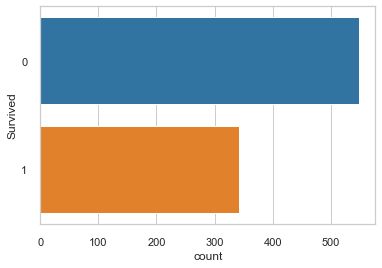

In [100]:
# Target Variable: Survival
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(train_df, y = 'Survived', palette=c_palette)

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
mode:  0    male
dtype: object
male      577
female    314
Name: Sex, dtype: int64


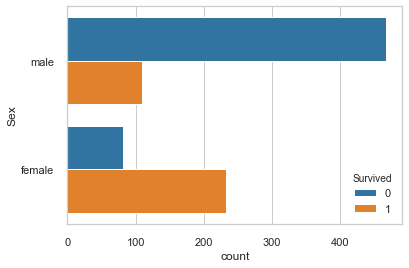

In [101]:
# Feature Variable: Gender
categorical_summarized(train_df, y = 'Sex', hue='Survived', palette=c_palette)

# Quantitative Analysis

In [102]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    29
dtype: int64


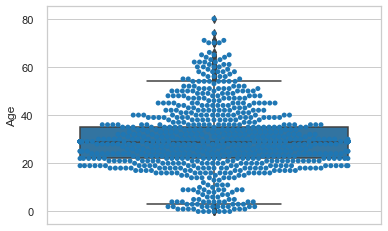

In [103]:
# univariate analysis
quantitative_summarized(dataframe= train_df, y = 'Age', palette=c_palette, verbose=False, swarm=True)

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    29
dtype: int64


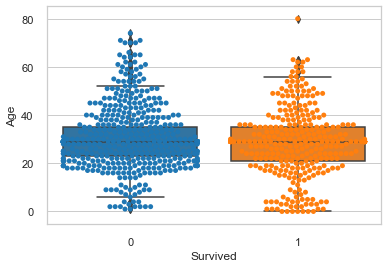

In [104]:
# bivariate analysis with target variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Survived', palette=c_palette, verbose=False, swarm=True)


In [105]:
c_palette3 = ['tab:blue', 'tab:orange', 'tab:green']

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    29
dtype: int64


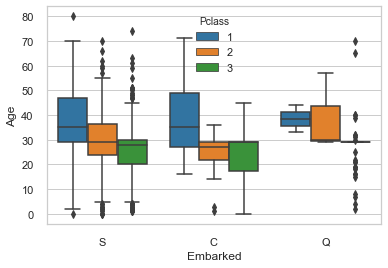

In [106]:
# multivariate analysis with Embarked variable and Pclass variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Embarked', hue = 'Pclass', palette=c_palette3, verbose=False, swarm=False)


# Clustering

# K-means Clustering

In [109]:
def simple_preprocessing(dataframe, train=True):
    le = LabelEncoder()
    X = dataframe.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
    X['Age'] = X['Age'].fillna(value=X['Age'].mode()[0])
    X['Embarked'] = le.fit_transform(X['Embarked'].fillna(value=X['Embarked'].mode()[0]))
    X['Sex'] = np.where(X['Sex'] == 'male', 1, 0)
    
    if train:
        X = X.drop(['Survived'], axis=1)
        y = np.where(dataframe['Survived'] == 1, 'Alive', 'Dead')
        y = pd.get_dummies(y, columns=['Survived'])
        return X, y
    else:
        return X

In [110]:
samples = simple_preprocessing(train_df, train = False)

In [111]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


Inertial of clusters:  143.12431330173067


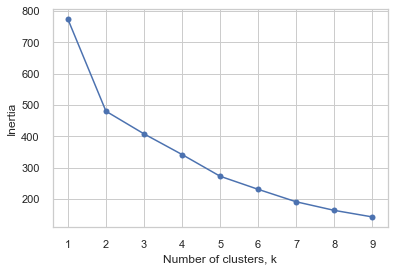

In [112]:
# inertias plot
# good k is a low inertia (how tight the data is in a cluster) and not too high

# Select Scaler
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.RobustScaler()
# scaler = preprocessing.StandardScaler()

samples = scaler.fit_transform(samples)
ks = range(1,10)
inertias = []

for k in ks:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(samples)
    inertias.append(k_mean.inertia_)

plt.plot(ks, inertias, '-o', c = 'b')
# plt.title('Inertia Plot')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
print('Inertial of clusters: ', k_mean.inertia_)
plt.show()

In [117]:
samples = simple_preprocessing(train_df, train = False)
# Select Scaler
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.RobustScaler()
# scaler = preprocessing.StandardScaler()

k_mean = KMeans(n_clusters=2)

sample_train,sample_val, gt_train, gt_val = train_test_split(samples, 
                                                                    train_df['Survived'],
                                                             test_size=0.2, random_state=99)

pipeline = make_pipeline(scaler, k_mean)
# labels = k_mean.predict(samples)
# centroids = k_mean.cluster_centers_
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
pipeline.fit(sample_train)
labels = pipeline.predict(sample_val)
print('Inertial of clusters: ', k_mean.inertia_)

Inertial of clusters:  380.317974180606


In [118]:
ct_df = pd.DataFrame({'labels': labels, 'survived': gt_val})
# create crosstb
ct = pd.crosstab(ct_df['labels'], ct_df['survived'])
print(ct)

survived    0   1
labels           
0           1  66
1         112   0


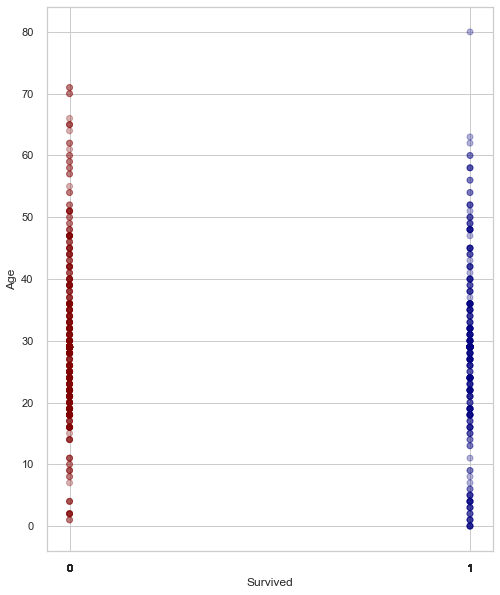

In [119]:
import matplotlib as mpl
fig = plt.figure(figsize = (8,10))
mpl.rcParams['image.cmap'] = 'jet'
labels = pipeline.predict(sample_train)
x_label = 'Survived'
y_label = 'Age'

plt.scatter(sample_train[x_label], sample_train[y_label], c = labels, alpha = 0.3)
plt.xlabel(x_label)
plt.xticks(sample_train[x_label])
plt.ylabel(y_label)
plt.show()

# Hierarchical Clustering

In [121]:
sample_train,sample_val, gt_train, gt_val = train_test_split(train_df, 
                                                                    train_df['Survived'],
                                                             test_size=0.05, random_state=99)

In [122]:
sample_val_processed = simple_preprocessing(sample_val, train = False)
sample_val_processed = scaler.fit_transform(sample_val_processed)

In [123]:
mergings = linkage(sample_val_processed, method='complete')

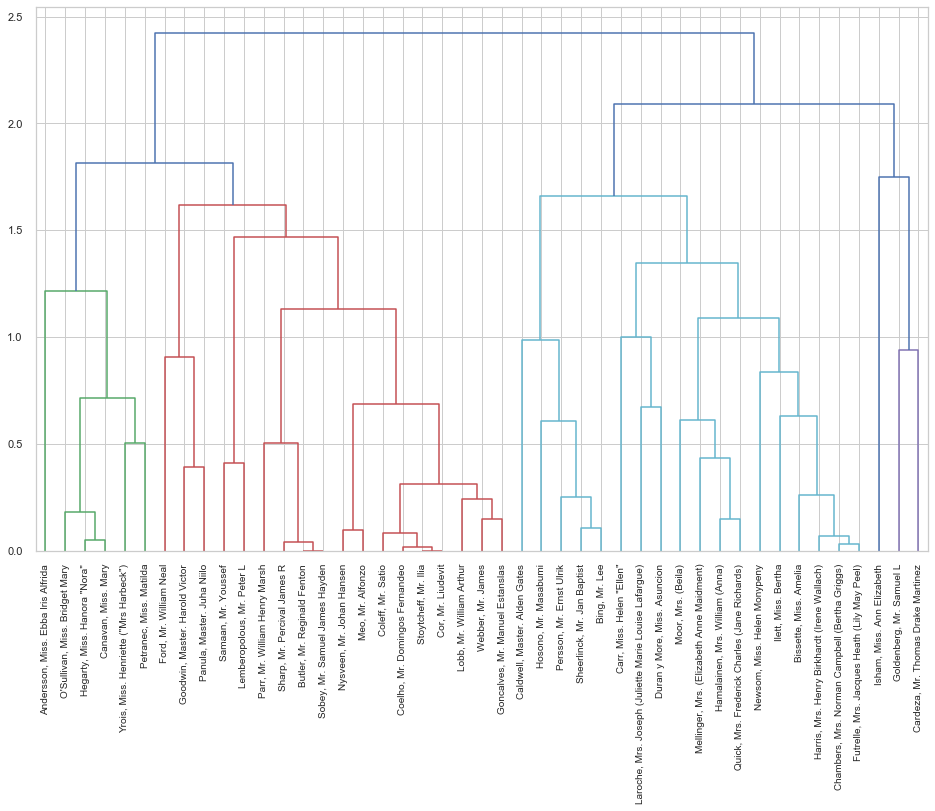

In [124]:
fig = plt.figure(figsize = (16,10))
dendrogram(mergings,
           labels=np.array(sample_val['Name']),
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

# Feature Selection

In [128]:
X_train, y_train = simple_preprocessing(train_df)
X_train,X_val, y_train,y_val = train_test_split(X_train, y_train,test_size=0.2, random_state=99)
X_test = simple_preprocessing(test_df, train=False)

In [129]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((712, 7), (712, 2), (179, 7), (179, 2), (418, 7))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        66
           1       0.86      0.85      0.86       113

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179
 samples avg       0.82      0.82      0.82       179



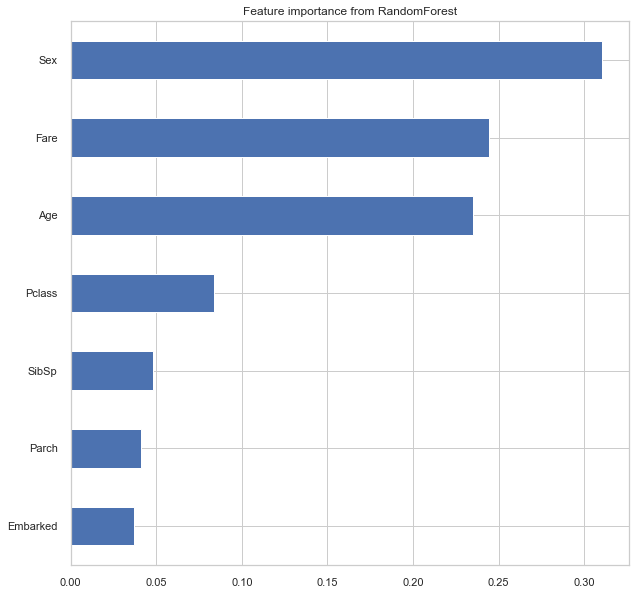

In [132]:
rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=12)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_val)

print("Accuracy:", metrics.accuracy_score(y_val, rf_y_pred))
print('='*80)
print(metrics.classification_report(y_val, rf_y_pred))

pd.Series(rf_clf.feature_importances_, index = X_train.columns).nlargest(9).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from RandomForest').invert_yaxis();

In [84]:
xgb_clf = XGBClassifier(max_depth=12, learning_rate=1e-4,n_estimators=500)
xgb_clf.fit(X_train, np.argmax(np.array(y_train), axis = 1))
xgb_y_pred = xgb_clf.predict(X_val)

pd.Series(xgb_clf.feature_importances_, index = X_train.columns).nlargest(12).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();


ModuleNotFoundError: No module named 'xgboost'